# UFC Fight Analysis

## Introduction

## Background

## Data

This data was forked from the [UFC Predictor and Notes](https://www.kaggle.com/calmdownkarm/ufc-predictor-and-notes) kaggle kernel. They scraped the data using Beautiful Soup and a Javascript API that pulled fighter data from ufc.com. The scripts pulled data from JSON objects and wrote them to a CSV. All data is from 2014 onwards and consists of fighter statistics merged with fight outcomes. They were unable to get data with the same level of detail in prior years, so all fighter records were reset to zero at the beginning of 2014 and built from there. It was an interesting project and I wanted to see if I could push it further.

In [1]:
# Imports and Helper Functions
# data Analysis
import pandas as pd
import numpy as np
import random as rng
from pprint import pprint

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#SciKit Learn Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

from subprocess import check_output
print check_output(["ls", "data"]).decode("utf8")
data = pd.read_csv("data/data.csv")
# Any results you write to the current directory are saved as output.

data.csv
data.csv.zip



In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Columns: 895 entries, BPrev to winner
dtypes: float64(873), int64(13), object(9)
memory usage: 10.1+ MB


## Variables

There are 895 variables, so it might be worth looking through them to get a better sense of the data. Right now, I'm only aware of a handful of variables and have no idea how many missing values are in the dataset. At least listing the variable names will allow me to categorize them and possibly engineer new features.

In [3]:
var_list = data.columns.values.tolist()
pprint(var_list[:100])
pprint(var_list[100:200])
pprint(var_list[200:300])
pprint(var_list[300:400])
pprint(var_list[400:500])
pprint(var_list[500:600])
pprint(var_list[600:700])
pprint(var_list[700:800])
pprint(var_list[800:895])

['BPrev',
 'BStreak',
 'B_Age',
 'B_Height',
 'B_HomeTown',
 'B_ID',
 'B_Location',
 'B_Name',
 'B_Weight',
 'B__Round1_Grappling_Reversals_Landed',
 'B__Round1_Grappling_Standups_Landed',
 'B__Round1_Grappling_Submissions_Attempts',
 'B__Round1_Grappling_Takedowns_Attempts',
 'B__Round1_Grappling_Takedowns_Landed',
 'B__Round1_Strikes_Body Significant Strikes_Attempts',
 'B__Round1_Strikes_Body Significant Strikes_Landed',
 'B__Round1_Strikes_Body Total Strikes_Attempts',
 'B__Round1_Strikes_Body Total Strikes_Landed',
 'B__Round1_Strikes_Clinch Body Strikes_Attempts',
 'B__Round1_Strikes_Clinch Body Strikes_Landed',
 'B__Round1_Strikes_Clinch Head Strikes_Attempts',
 'B__Round1_Strikes_Clinch Head Strikes_Landed',
 'B__Round1_Strikes_Clinch Leg Strikes_Attempts',
 'B__Round1_Strikes_Clinch Leg Strikes_Landed',
 'B__Round1_Strikes_Clinch Significant Kicks_Attempts',
 'B__Round1_Strikes_Clinch Significant Kicks_Landed',
 'B__Round1_Strikes_Clinch Significant Punches_Attempts',
 'B__Rou

## Description
From this, we can see that we have a total of 879 Columns and one dependent variable. 
The columns themselves have 4 integer types (Streaks, Previous Wins etc), 5 object types (Names, Winner - basically strings and arrays) and 870 Float types. 
This however does not give us a complete picture of our data, so we're using a few other pandas functions to get a better glimpse. 
We also had to engineer a few features that weren't available in the JSONs as explained in the data explanation in the introduction of the project. 

In [4]:
data.describe()

,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,1477.000000,1477.000000,1474.000000,1476.000000,1477.000000,1477.000000,978.000000,978.000000,978.000000,978.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,1.735274,0.654705,30.954545,177.451220,1964.633040,73.804333,0.036810,0.896728,0.431493,2.986708,...,211.965278,34.062500,66.604167,5.527778,4.319444,5.138889,12.097222,224.965278,4.562500,263.069444
std,1.895561,1.057269,4.020311,8.561541,666.949141,14.980531,0.193748,1.255722,0.830527,3.987291,...,139.412374,68.819742,94.574736,22.374419,12.854023,14.312013,36.429320,142.328509,19.698681,162.386212
min,0.000000,0.000000,20.000000,152.000000,129.000000,52.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,28.000000,172.000000,1755.000000,65.000000,0.000000,0.000000,0.000000,0.000000,...,110.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,126.750000,0.000000,139.000000
50%,1.000000,0.000000,31.000000,177.000000,2156.000000,70.000000,0.000000,0.000000,0.000000,2.000000,...,214.000000,0.000000,9.500000,0.000000,0.000000,0.000000,0.000000,232.000000,0.000000,291.000000
75%,3.000000,1.000000,34.000000,182.000000,2337.000000,84.000000,0.000000,1.000000,1.000000,4.000000,...,294.500000,47.500000,109.000000,0.000000,0.000000,0.000000,2.000000,299.000000,0.000000,300.000000
max,11.000000,7.000000,46.000000,213.000000,2882.000000,120.000000,2.000000,9.000000,6.000000,33.000000,...,647.000000,496.000000,529.000000,144.000000,91.000000,62.000000,264.000000,659.000000,128.000000,841.000000


In [5]:
data.describe(include=['O'])

,B_HomeTown,B_Location,B_Name,Date,R_HomeTown,R_Location,R_Name,winby,winner
count,1471,1470,1477,1477,1477,1476,1477,1461,1477
unique,568,431,719,224,495,390,633,3,4
top,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Tim Means,07/11/2016,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Donald Cerrone,DEC,red
freq,32,38,8,32,44,67,11,720,867


In [6]:
data.describe(include=[np.int])

,BPrev,BStreak,B_ID,B_Weight,Event_ID,Fight_ID,Last_round,Max_round,RPrev,RStreak,R_Height,R_ID,R_Weight
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,1.735274,0.654705,1964.633040,73.804333,733.943805,5583.656060,2.417062,3.208531,2.125254,0.721733,177.436696,1766.935003,73.935003
std,1.895561,1.057269,666.949141,14.980531,50.851452,611.609705,0.990158,0.605850,1.979199,1.136555,8.667657,697.191563,15.069751
min,0.000000,0.000000,129.000000,52.000000,646.000000,4521.000000,1.000000,3.000000,0.000000,0.000000,154.000000,129.000000,52.000000
25%,0.000000,0.000000,1755.000000,65.000000,687.000000,5016.000000,1.000000,3.000000,1.000000,0.000000,172.000000,1253.000000,65.000000
50%,1.000000,0.000000,2156.000000,70.000000,738.000000,5580.000000,3.000000,3.000000,2.000000,0.000000,177.000000,2015.000000,70.000000
75%,3.000000,1.000000,2337.000000,84.000000,780.000000,6142.000000,3.000000,3.000000,3.000000,1.000000,185.000000,2255.000000,84.000000
max,11.000000,7.000000,2882.000000,120.000000,816.000000,6627.000000,5.000000,5.000000,12.000000,9.000000,213.000000,2870.000000,120.000000


### Some Notes to observe
1. Red Side seems to win slightly more than blue (867/1477 = 58.7%)
2. Donald Cerrone fights on Red side more than any other fighter, with 11 fights
3. Tim Means fights on Blue side more than any other fighter with 8
4. There are more fighters fighting debut fights. This statistic however could be skewed by the fact that our data set assumes debuts of every fighter in 2013
5. Most Fights are won by decision, and 2015 had the most fights. 
6. The Most common hometown and training location for fighters is Rei De Janeiro in Brazil
We also notice that 3 fighters don't have an age and 1 doesn't have a height. 

In [7]:
data.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,1,1,23.0,182.0,Trento Italy,2783,Mezzocorona Italy,Marvin Vettori,84,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
1,0,0,32.0,175.0,"Careiro da Várzea, Amazonas Brazil",2208,"Pharr, Texas USA",Carlos Diego Ferreira,70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue
2,2,0,38.0,172.0,Kanagawa Japan,721,Tokyo Japan,Takanori Gomi,70,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,23.0,170.0,Tijuana Mexico,2825,Tijuana Mexico,Brandon Moreno,56,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue
4,3,1,30.0,167.0,"Spokane, WA USA",2260,"Spokane, WA USA",Elizabeth Phillips,61,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [8]:
data.tail()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
1472,0,0,26.0,172.0,"Tlaltenango, Zacatecas Mexico",2355,"San Diego, California USA",Jose Quinonez,61,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
1473,2,1,26.0,165.0,"Tampa, Florida USA",2610,"Tampa, Florida USA",Geane Herrera,56,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DEC,red
1474,3,2,36.0,187.0,"Doylestown, Pennsylvania USA",1694,"Dana Point, California USA",Patrick Cummins,93,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1475,3,1,31.0,167.0,Irvine Scotland,2339,Glasgow Scotland,Joanne Calderwood,52,0.0,...,0.0,0.0,0.0,0.0,0.0,301.0,0.0,301.0,KO/TKO,blue
1476,2,1,31.0,187.0,The Netherlands,786,"Leiden, Holland The Netherlands",Gegard Mousasi,84,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,red


Using the head() and tail() function calls of pandas lets us look at individual rows. In this case, we notice that a large number of columns in our dataset have NaN or Not a Number as an entry - this is how pandas interprets an empty field from our CSV. The reason the NaN values exist is because we have assumed that every fighter starts from zero in 2013. This means that before their first fight in the time beyond 2013, their previous record is blank. 

Pandas by default has two methods of dealing with NaN Values we can choose to either replace them with a value or drop them entirely.
Since it is highly unlikely that any of our dataset has a value that isn't null, we chose to replace all the NaN with the value 0 instead. 

In [9]:
data.fillna(value=0,inplace=True)

In [10]:
data.tail()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
1472,0,0,26.0,172.0,"Tlaltenango, Zacatecas Mexico",2355,"San Diego, California USA",Jose Quinonez,61,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DEC,red
1473,2,1,26.0,165.0,"Tampa, Florida USA",2610,"Tampa, Florida USA",Geane Herrera,56,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DEC,red
1474,3,2,36.0,187.0,"Doylestown, Pennsylvania USA",1694,"Dana Point, California USA",Patrick Cummins,93,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DEC,blue
1475,3,1,31.0,167.0,Irvine Scotland,2339,Glasgow Scotland,Joanne Calderwood,52,0.0,...,0.0,0.0,0.0,0.0,0.0,301.0,0.0,301.0,KO/TKO,blue
1476,2,1,31.0,187.0,The Netherlands,786,"Leiden, Holland The Netherlands",Gegard Mousasi,84,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SUB,red


## Data Cleaning

The first step in data cleaning is to remove obvious outliers and columns that will not contribute to the model. One starting point is narrowing down the fights to just wins and losses, excluding no contests and draws. No contests are nearly impossible to predict as are draws, so it doesn't make sense to account for them. Here's a list of ideas so far:

1. Draws or no contest ['winner']
2. Blue and red ID
3. Blue and red Name
4. Blue and red Name
5. Date

There are also a few other ideas in relation to tidying the data. It is currently not in "tidy" format, so I may consider tidying the data. One obvious hint that this is the case is that every row has a round_4 and round_5 column, even though not all fights go to the last round. I'll see what I can do in terms of reshaping the data and look into whether it makes sense to do so. I wonder if there's a dplyr and tidyr package for Python? The R equivalents are pretty robust, so I'll probably start there. Here's an ongoing list of ideas that may be worth pursuing:

1. Rearrange data to get rid of empty Round4 and Round5 data
2. Separate city and country (Brazil vs RioDijanero Brazil and USA vs Stockton, California USA may add more predictive power)
3. Change landed and attempted data into percentages. This may help make better comparisons across fighters making debuts vs fighters with established records.
4. Add a column for submission wins, KO wins, etc

I'm debating whether to turn the database into a database of fighters instead of a database of fights. One reason is that you have the accumulated statistics on each fighter's history going into each event. If you have Jon Jones matching up against DC, it may be useful to ask, "What is it about Jon Jones' record that makes him a favorite? This may require a lot or rearranging, so it may be worth it to think this through a bit first.

If I were to go this route, I would reset each fighter's stats and only add stats that came prior to each fight. For example, if Frankie Edgar fought in 2013 against Anderson Silva and then fought again against Matt Hughes in 2014, I'd want their fighter record inputs to be different. I think this may be a more comprehensive way of looking at the data and would align more closely to real-world applications. Here's a rough sketch of what the process might look like:

1. Sort the dataframe by date
2. Add each fighter's stats cumulatively based on prior fights
  1. Figure out a way to accomplish this even though red is on one side and blue is on the other
  2. Maybe put fighters on just red or blue? Might be impossible..
  3. Maybe just account for this in the code? If B_Name == 'X' do this or if R_Name == 'X' do that
3. Add columns for kicks taken, punches taken, etc?
  1. One disadvantage is that this would mean nearly doubling the number of variables in a dataset that is already massive. This will hurt some machine learning models. Actually, this could lead to more variables than observations which would be no bueno, although it would still be possible to pare it down afterwards. Let's omit this for now and come back to it later if necessary.
4. Consider consolidating round data. Why do you need 5 rounds of data for each fighter? Consider building a granular model and an aggragated model.

In [11]:
data = data[data['winby'].notnull()]

In [12]:
dropdata = data.drop(['B_ID','B_Name','R_ID','R_Name','Date'],axis=1)
dropdata.rename(columns={'BPrev':'B__Prev',
                         'RPrev':'R__Prev',
                         'B_Age':'B__Age',
                         'B_Height':'B__Height',
                         'B_Weight':'B__Weight',
                         'R_Age':'R__Age',
                         'R_Height':'R__Height',
                         'R_Weight':'R__Weight',
                         'BStreak':'B__Streak',
                         'RStreak': 'R__Streak'},inplace=True)
dropdata.describe()

,B__Prev,B__Streak,B__Age,B__Height,B__Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,...,1477.000000,1477.000000,1477.000000,1477.00000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,1.735274,0.654705,30.891672,177.331077,73.804333,0.024374,0.593771,0.285714,1.977657,0.801625,...,20.665538,3.320921,6.493568,0.53893,0.421124,0.501016,1.179418,21.932972,0.444821,25.647935
std,1.895561,1.057269,4.251308,9.724703,14.980531,0.158590,1.106235,0.705874,3.538432,1.538326,...,76.413344,23.685752,35.456443,7.15484,4.201244,4.708527,11.893653,80.116955,6.279119,92.995938
min,0.000000,0.000000,0.000000,0.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,28.000000,172.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,31.000000,177.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,34.000000,182.000000,84.000000,0.000000,1.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11.000000,7.000000,46.000000,213.000000,120.000000,2.000000,9.000000,6.000000,33.000000,17.000000,...,647.000000,496.000000,529.000000,144.00000,91.000000,62.000000,264.000000,659.000000,128.000000,841.000000


In [13]:
dropdata.describe(include=['O'])

,B_HomeTown,B_Location,R_HomeTown,R_Location,winby,winner
count,1477,1477,1477,1477,1477,1477
unique,569,432,495,391,4,4
top,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Rio de Janeiro Brazil,DEC,red
freq,32,38,44,67,720,867


Next we need to convert our object types of columns into categorical columns. This is done to sort by logical order

In [14]:
objecttypes = list(dropdata.select_dtypes(include=['O']).columns)
for col in objecttypes:
    dropdata[col] = dropdata[col].astype('category')

In [15]:
cat_columns = dropdata.select_dtypes(['category']).columns
dropdata[cat_columns] = dropdata[cat_columns].apply(lambda x: x.cat.codes)
dropdata.info()
dropdata.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 0 to 1476
Columns: 890 entries, B__Prev to winner
dtypes: float64(873), int16(4), int64(11), int8(2)
memory usage: 10.0 MB


,B__Prev,B__Streak,B__Age,B__Height,B_HomeTown,B_Location,B__Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
1472,0,0,26.0,172.0,505,331,61,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3
1473,2,1,26.0,165.0,491,378,56,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3
1474,3,2,36.0,187.0,125,110,93,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1475,3,1,31.0,167.0,210,154,52,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,301.0,0.0,301.0,2,0
1476,2,1,31.0,187.0,501,209,84,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3


## Data Correlation
While it would otherwise be normal practise to draw a heatmap or correlation matrix of our data to look for linear relationships, this is highly illogical due to the sheer number of features we're currently looking at.  Instead we examine the n largest correlations with our dependent variable (winner) to look for linear relationships - as you can see from the plot below, the relationships (if they exist) are highly non-linear. This suggests that alterations to our Data Set are required. 

Further, it seems that Round 4 statistics for the Red Fighter are the more correlating, this suggests that a split or delta sort of data set should produce better results. 

In [16]:
# Basic Correlation Matrix
# corrmat = data.corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);

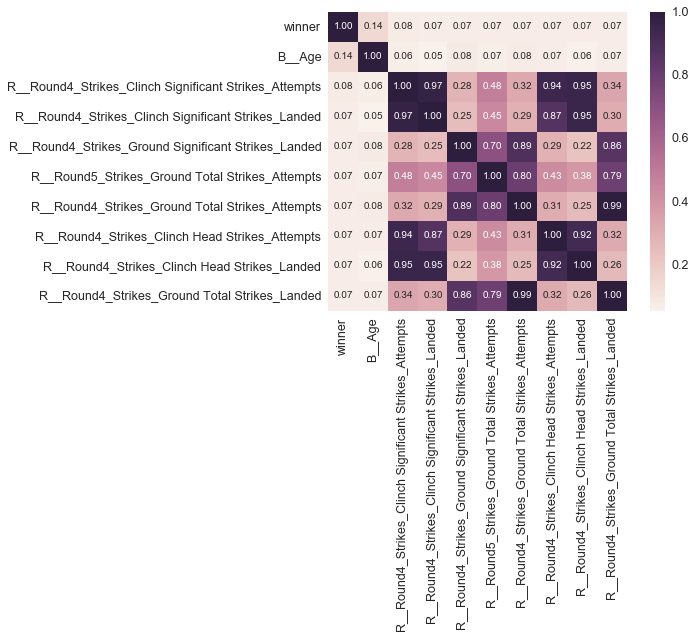

In [17]:
# Subset Correlation Matrix
k = 10 #number of variables for heatmap
corrmat = dropdata.corr()
cols = corrmat.nlargest(k, 'winner')['winner'].index
cm = np.corrcoef(dropdata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Modeling
We're evaluating the following models

1. Perceptron
2. Random Forests
3. Decision Trees Classifier
4. SGD Classifier
5. Linear SVC
6. Gaussian NB
7. KNN

In [18]:
 #We Store prediction of each model in our dict
# Helper Functions for our models. 

def percep(X_train,Y_train,X_test,Y_test,Models):
    perceptron = Perceptron(max_iter = 1000, tol = 0.001)
    perceptron.fit(X_train, Y_train)
    Y_pred = perceptron.predict(X_test)
    Models['Perceptron'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def ranfor(X_train,Y_train,X_test,Y_test,Models):
    randomfor = RandomForestClassifier(max_features="sqrt",
                                       n_estimators = 700,
                                       max_depth = None,
                                       n_jobs=-1
                                      )
    randomfor.fit(X_train,Y_train)
    Y_pred = randomfor.predict(X_test)
    Models['Random Forests'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def dec_tree(X_train,Y_train,X_test,Y_test,Models):
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, Y_train)
    Y_pred = decision_tree.predict(X_test)
    Models['Decision Tree'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def SGDClass(X_train,Y_train,X_test,Y_test,Models):
    sgd = SGDClassifier(max_iter = 1000, tol = 0.001)
    sgd.fit(X_train, Y_train)
    Y_pred = sgd.predict(X_test)
    Models['SGD Classifier'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def linSVC(X_train,Y_train,X_test,Y_test,Models):
    linear_svc = LinearSVC()
    linear_svc.fit(X_train, Y_train)
    Y_pred = linear_svc.predict(X_test)
    Models['SVM'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def bayes(X_train,Y_train,X_test,Y_test,Models):
    gaussian = GaussianNB()
    gaussian.fit(X_train, Y_train)
    Y_pred = gaussian.predict(X_test)
    Models['Bayes'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def Nearest(X_train,Y_train,X_test,Y_test,Models):
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    Models['KNN'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]

def run_all_and_Plot(df):
    Models = dict()
    from sklearn.model_selection import train_test_split
    X_all = df.drop(['winner'], axis=1)
    y_all = df['winner']
    X_train, X_test, Y_train, Y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)
    percep(X_train,Y_train,X_test,Y_test,Models)
    ranfor(X_train,Y_train,X_test,Y_test,Models)
    dec_tree(X_train,Y_train,X_test,Y_test,Models)
    SGDClass(X_train,Y_train,X_test,Y_test,Models)
    linSVC(X_train,Y_train,X_test,Y_test,Models)
    bayes(X_train,Y_train,X_test,Y_test,Models)
    Nearest(X_train,Y_train,X_test,Y_test,Models)
    return Models


def plot_bar(dict):
    labels = tuple(dict.keys())
    y_pos = np.arange(len(labels))
    values = [dict[n][0] for n in dict]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, labels,rotation='vertical')
    plt.ylabel('accuracy')
    plt.title('Accuracy of different models')
    plt.show()


def plot_cm(dict):
    count = 1
    fig = plt.figure(figsize=(10,10))
    for model in dict:
        cm = dict[model][1]
        labels = ['W','L','N','D']
        ax = fig.add_subplot(4,4,count)
        cax = ax.matshow(cm)
        plt.title(model,y=-0.8)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        # plt.subplot(2,2,count)
        count+=1
    plt.tight_layout()
    plt.show()

KNN 0.523648648649
SVM 0.631756756757
Decision Tree 0.533783783784
Random Forests 0.581081081081
SGD Classifier 0.618243243243
Bayes 0.402027027027
Perceptron 0.567567567568


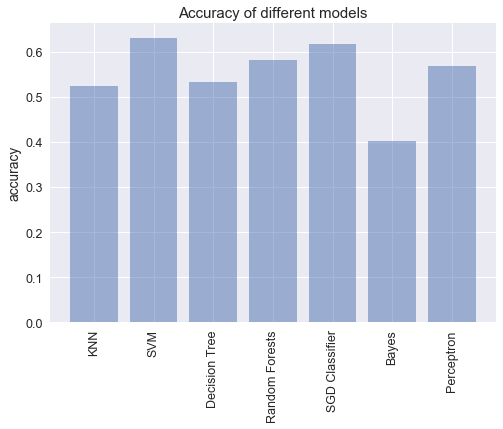

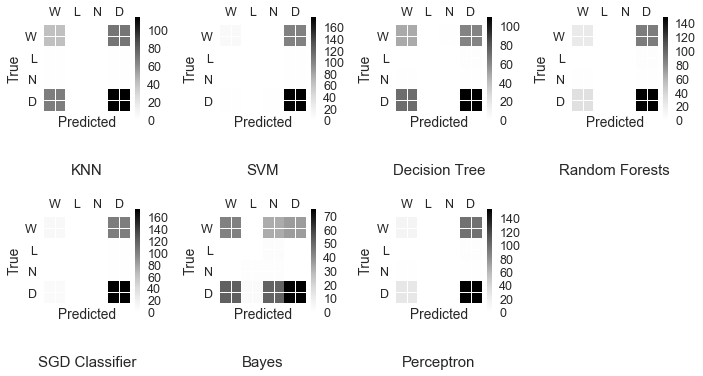

In [19]:
accuracies = run_all_and_Plot(dropdata)
CompareAll = dict()
CompareAll['Baseline'] = accuracies
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
plot_bar(accuracies)
plot_cm(accuracies)

Theoretically, we should get best results from our Random Forests Model, thus attempting to tune hyper parameters using GridSearch from Scikit learn

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
#X_all = dropdata.drop(['winner'], axis=1)
#y_all = dropdata['winner']
#X_train, X_test, Y_train, Y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=23)
#rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True, max_depth=None) 
#param_grid = { 
#    'n_estimators': [200,700],
#    'max_features': ['auto', 'sqrt', 'log2']
#}

#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#CV_rfc.fit(X_train, Y_train)
#print(CV_rfc.best_params_)

#### Trying to improve results by dividing features

In [21]:
dontchange = ['winner','Event_ID','Fight_ID','Max_round','Last_round','B_Age','R_Age']
numeric_cols = [col for col in dropdata if col not in dontchange]
dropdata[numeric_cols] += 1 

In [37]:
newDF = dropdata.copy()
blue_cols = [col for col in dropdata.columns if 'B__' in col]
red_cols = [col for col in dropdata.columns if 'R__' in col]
for (blue,red) in zip(blue_cols,red_cols):
    newkey = ''.join(str(blue).split('_')[2:])
    dropdata[newkey] = dropdata[str(blue)]/dropdata[str(red)]
    del dropdata[str(blue)]
    del dropdata[str(red)]
newDF.head()

,B_HomeTown,B_Location,Event_ID,Fight_ID,Last_round,Max_round,R_HomeTown,R_Location,winby,winner,...,Round5TIPDistance Time,Round5TIPGround Control Time,Round5TIPGround Time,Round5TIPGuard Control Time,Round5TIPHalf Guard Control Time,Round5TIPMisc. Ground Control Time,Round5TIPMount Control Time,Round5TIPNeutral Time,Round5TIPSide Control Time,Round5TIPStanding Time
0,512,244,802,6405,3,3,190,79,2,3,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,88,293,670,4786,1,3,98,121,4,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,229,387,729,5523,1,3,54,51,3,3,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,504,385,790,6240,1,3,164,167,4,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,465,356,785,6226,3,3,80,83,2,3,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


KNN 0.570945945946
SVM 0.560810810811
Decision Tree 0.527027027027
Random Forests 0.584459459459
SGD Classifier 0.611486486486
Bayes 0.358108108108
Perceptron 0.611486486486


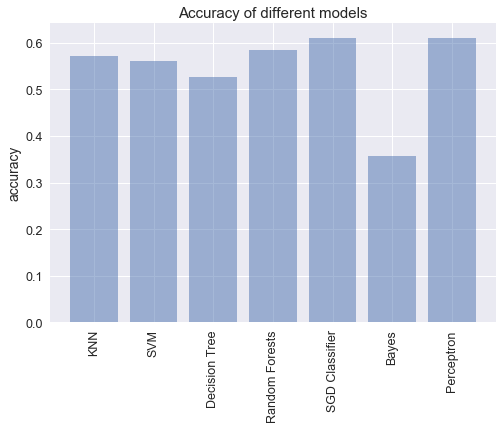

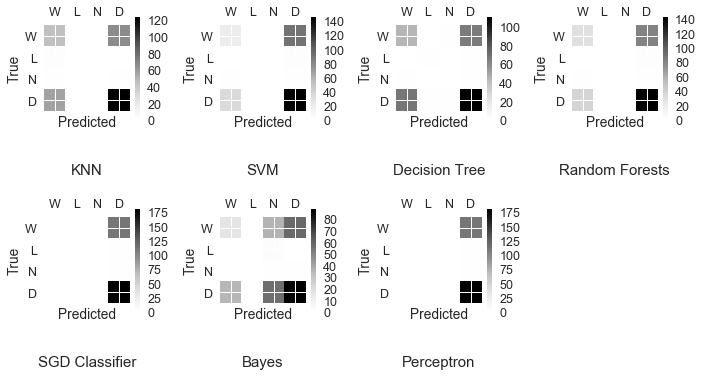

In [23]:
accuracies = run_all_and_Plot(dropdata)
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
CompareAll['Blue/Red'] = accuracies
plot_bar(accuracies)
plot_cm(accuracies)


#### Dropping Round 4 and Round 5 since most fights are 3 round Max. 

KNN 0.554054054054
SVM 0.375
Decision Tree 0.547297297297
Random Forests 0.581081081081
SGD Classifier 0.101351351351
Bayes 0.375
Perceptron 0.611486486486


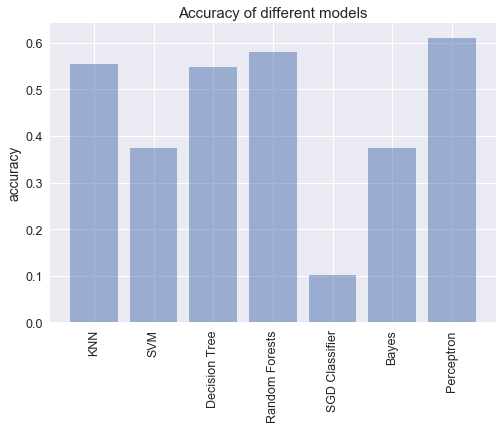

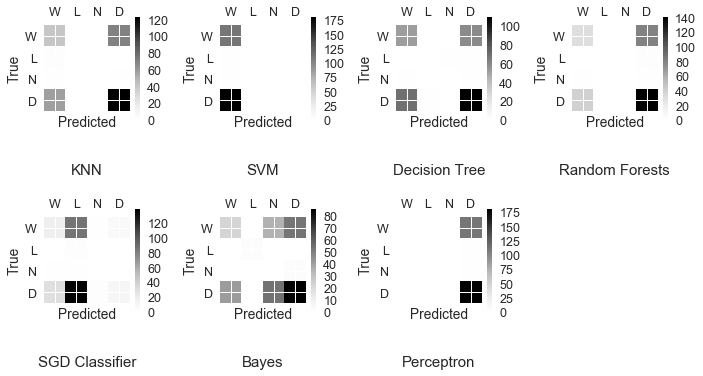

In [24]:
r4 = [col for col in dropdata.columns if "Round4" in col]
r5 = [col for col in dropdata.columns if "Round5" in col]
threerounds = dropdata.drop(r4+r5,axis = 1)
accuracies = run_all_and_Plot(threerounds)
for key,val in accuracies.items():
    print(str(key)+' '+str(val[0]))
CompareAll['DropR4&R5'] = accuracies
plot_bar(accuracies)
plot_cm(accuracies)

#### Dropping 5 round fights entirely

KNN 0.554054054054
SVM 0.550675675676
Decision Tree 0.530405405405
Random Forests 0.581081081081
SGD Classifier 0.608108108108
Bayes 0.347972972973
Perceptron 0.611486486486


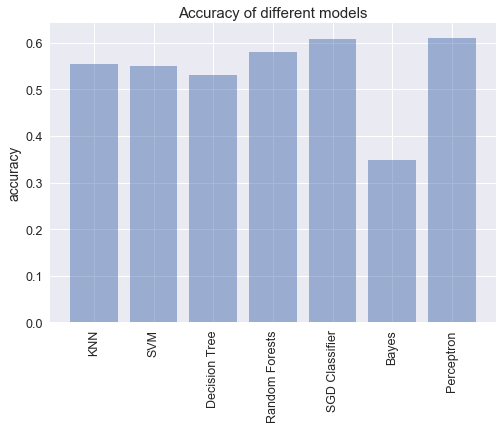

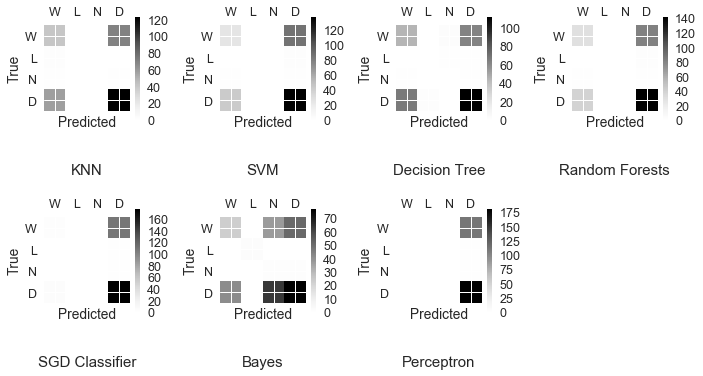

In [25]:
foobar = threerounds.loc[threerounds['Max_round'] == 3]
bewb = threerounds.drop(['Max_round','Last_round'],axis=1)
accuracies = run_all_and_Plot(bewb)
for key,val in accuracies.items():
    print(str(key)+' '+str(val[0]))
CompareAll['Drop5RoundFights'] = accuracies
plot_bar(accuracies)
plot_cm(accuracies)

#### Dropping First Fights

KNN 0.510309278351
SVM 0.541237113402
Decision Tree 0.556701030928
Random Forests 0.567010309278
SGD Classifier 0.443298969072
Bayes 0.40206185567
Perceptron 0.541237113402


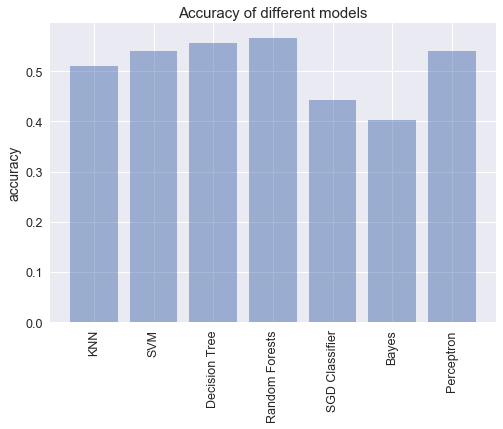

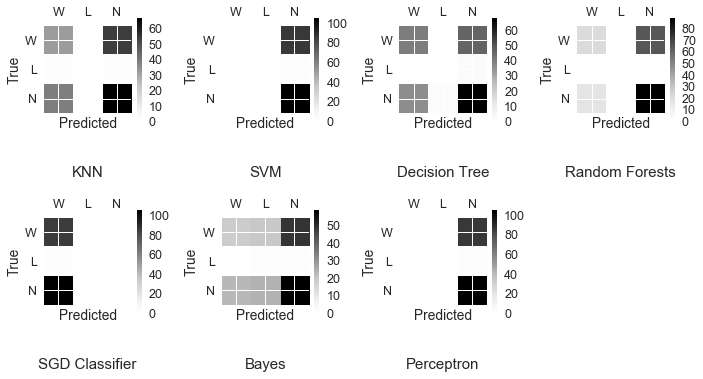

In [26]:
blahblah = bewb[bewb.Prev != 1]
accuracies = run_all_and_Plot(blahblah)
for key,val in accuracies.items():
    print(str(key)+' '+str(val[0]))
CompareAll['DroppingDebut'] = accuracies
plot_bar(accuracies)
plot_cm(accuracies)

In [38]:
blue_cols

[]

### Aggregate Round Stats

This block of code sums the stats for each round into one value. For example, it combines round 1-5 strikes_landed into a single value. This is what I was thinking of doing. May have to borrow this code in my analysis.

In [27]:
# This block 
blue_cols
newDF.info()
b_feats = list(set([x[10:] for x in blue_cols if "Round" in x]))
r_feats = list(set([x[10:] for x in red_cols if "Round" in x]))
def sumshit(b_feats,cols):
    for x in b_feats:
        newDF.loc[:,x] = 0
        for y in cols:
            if x in y:
                newDF[x] += newDF[y]
                newDF.drop(y,axis=1,inplace=True)
sumshit(b_feats,blue_cols)
sumshit(r_feats,red_cols)
newDF.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 0 to 1476
Columns: 890 entries, B__Prev to winner
dtypes: float64(873), int16(4), int64(11), int8(2)
memory usage: 10.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 0 to 1476
Columns: 107 entries, B__Prev to Strikes_Clinch Significant Kicks_Landed
dtypes: float64(90), int16(4), int64(11), int8(2)
memory usage: 1.2 MB


KNN 0.530405405405
SVM 0.608108108108
Decision Tree 0.564189189189
Random Forests 0.574324324324
SGD Classifier 0.375
Bayes 0.260135135135
Perceptron 0.611486486486


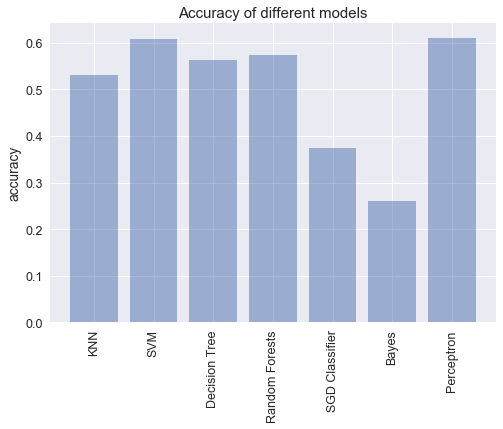

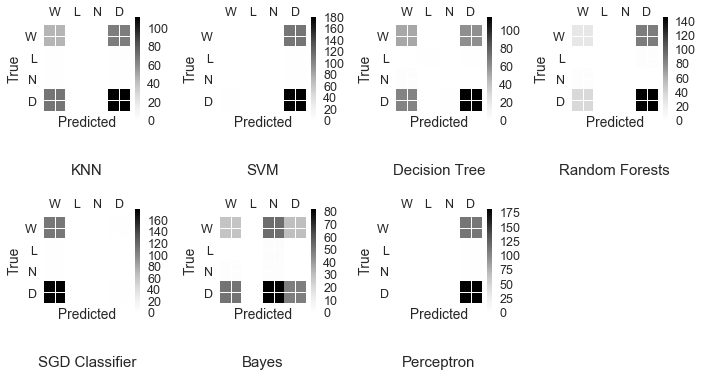

In [28]:
newDF.describe()
accuracies = run_all_and_Plot(newDF)
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
CompareAll['SumRounds'] = accuracies
plot_bar(accuracies)
plot_cm(accuracies)



### Comparing Red to Blue

This block compares red stats to blue stats. It creates a ratio of strikes landed vs strikes received for each category. Very useful. I think I'm going to borrow this code as well since it's an idea I was thinking about implementing.

In [29]:
blue_cols = [col for col in newDF.columns if 'B__' in col]
red_cols = [col for col in newDF.columns if 'R__' in col]
for (blue,red) in zip(blue_cols,red_cols):
    newkey = ''.join(str(blue).split('_')[2:])
    newDF[newkey] = newDF[str(blue)]/newDF[str(red)]
    del newDF[str(blue)]
    del newDF[str(red)]

KNN 0.537162162162
SVM 0.378378378378
Decision Tree 0.513513513514
Random Forests 0.614864864865
SGD Classifier 0.587837837838
Bayes 0.273648648649
Perceptron 0.611486486486


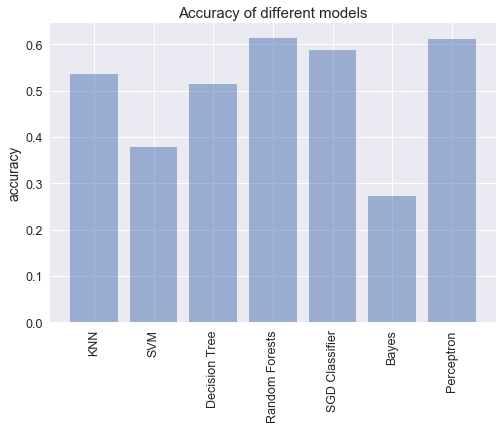

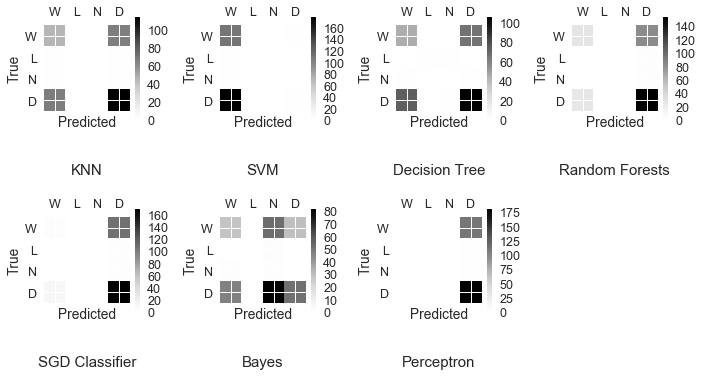

In [30]:
accuracies = run_all_and_Plot(newDF)
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
CompareAll['SumRounds'] = accuracies
plot_bar(accuracies)
plot_cm(accuracies)

### Reducing Features

This block drops features that are seemingly arbitrary and may have little effect on the data. It drops weight, hometown, event location, event id, fight id, max round and last round. Interestingly, the accuracy scores dip slightly after this is done. I'm not sure I agree with the decisions made here. For instance, I still want to take a look at splitting the columns by city and country. I'm not sure about the others. I'll have to combe back to this later down the road.

KNN 0.516891891892
SVM 0.564189189189
Decision Tree 0.523648648649
Random Forests 0.560810810811
SGD Classifier 0.537162162162
Bayes 0.341216216216
Perceptron 0.472972972973


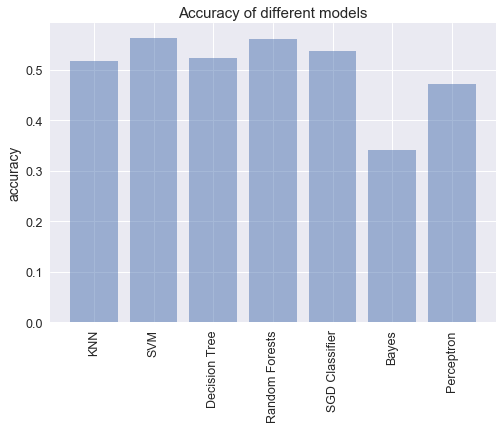

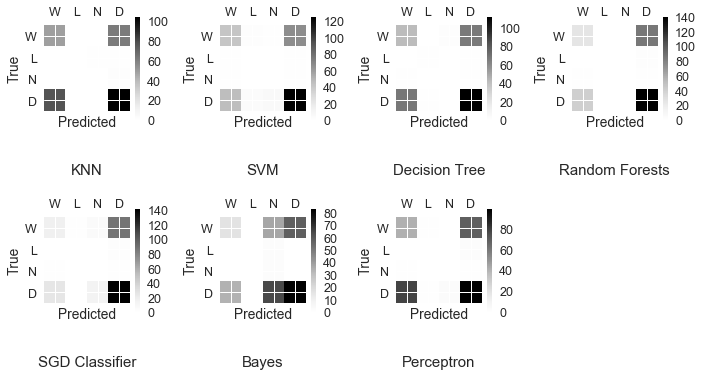

In [39]:
reduced_features = newDF.drop(["Weight","B_HomeTown","B_Location", "Event_ID", "Fight_ID", "Max_round", "Last_round", "R_HomeTown", "R_Location"],axis = 1)
accuracies = run_all_and_Plot(reduced_features)
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
CompareAll['Reduced Features'] = accuracies
plot_bar(accuracies)
plot_cm(accuracies)


In [31]:
reduced_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 93 columns):
winby                                          1477 non-null int8
winner                                         1477 non-null int8
Strikes_Distance Head Kicks_Attempts           1477 non-null float64
Strikes_Distance Leg Kicks_Landed              1477 non-null float64
Strikes_Distance Head Strikes_Attempts         1477 non-null float64
Strikes_Head Significant Strikes_Landed        1477 non-null float64
Strikes_Distance Body Punches_Landed           1477 non-null float64
Strikes_Legs Significant Strikes_Attempts      1477 non-null float64
Strikes_Ground Head Strikes_Landed             1477 non-null float64
Strikes_Clinch Body Strikes_Landed             1477 non-null float64
TIP_Clinch Time                                1477 non-null float64
Strikes_Legs Total Strikes_Landed              1477 non-null float64
Strikes_Clinch Total Strikes_Landed            1477 non-null float64
St

In [36]:
sorted(reduced_features.columns.values.tolist())

['Age',
 'Grappling_Reversals_Landed',
 'Grappling_Standups_Landed',
 'Grappling_Submissions_Attempts',
 'Grappling_Takedowns_Attempts',
 'Grappling_Takedowns_Landed',
 'Height',
 'Prev',
 'Streak',
 'Strikes_Body Significant Strikes_Attempts',
 'Strikes_Body Significant Strikes_Landed',
 'Strikes_Body Total Strikes_Attempts',
 'Strikes_Body Total Strikes_Landed',
 'Strikes_Clinch Body Strikes_Attempts',
 'Strikes_Clinch Body Strikes_Landed',
 'Strikes_Clinch Head Strikes_Attempts',
 'Strikes_Clinch Head Strikes_Landed',
 'Strikes_Clinch Leg Strikes_Attempts',
 'Strikes_Clinch Leg Strikes_Landed',
 'Strikes_Clinch Significant Kicks_Attempts',
 'Strikes_Clinch Significant Kicks_Landed',
 'Strikes_Clinch Significant Punches_Attempts',
 'Strikes_Clinch Significant Punches_Landed',
 'Strikes_Clinch Significant Strikes_Attempts',
 'Strikes_Clinch Significant Strikes_Landed',
 'Strikes_Clinch Total Strikes_Attempts',
 'Strikes_Clinch Total Strikes_Landed',
 'Strikes_Distance Body Kicks_Attem

## Conclusion
Our model has a best predictive value that lies between 58-63% on average between runs. Despite a very low accuracy model, we believe this is the best possible given the amount of available data and its inherent noise. 

## Future Work
1. With time, data available should increase
2. Further manipulations with our data set. 
